# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?

What is the *shape* of the thing we are taking the derivative with respect to?

What is the *shape* of the result of the expression?

**Answer a)**\
We are taking the derivative of $\boldsymbol{a}^T\boldsymbol{x}$, where $\boldsymbol{a}^T$ is a row-vector with length n ,and $\boldsymbol{x}$ is a column vector with length n. Multiplied together they compute to a single number (shape $(1 \times 1)$).

We are taking the derivative with respect to $\boldsymbol{x}$. It is a column-vector with length n, so it has the shape $(n \times 1)$.

The expression can be written as $$\begin{bmatrix} \frac{\partial(\boldsymbol{a}^T\boldsymbol{x})}{\partial x_0} & \frac{\partial(\boldsymbol{a}^T\boldsymbol{x})}{\partial x_1} & \dots & \frac{\partial(\boldsymbol{a}^T\boldsymbol{x})}{\partial x_{n-1}} \end{bmatrix},$$
and because the $\boldsymbol{a}^T\boldsymbol{x}$ is a single number, the shape of the result of the expression is this row-vector with shape $(1 \times n)$

---

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

**Answer b)**\
We have the expression
$$
\boldsymbol{a}^T\boldsymbol{x} = \sum_{i=0}^{n-1}a_i x_i \\
$$
Then we have
$$
\begin{align*}

\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} &= \begin{bmatrix} 
\frac{\partial(\boldsymbol{a}^T\boldsymbol{x})}{\partial x_0} & 
\frac{\partial(\boldsymbol{a}^T\boldsymbol{x})}{\partial x_1} & 
\dots & 
\frac{\partial(\boldsymbol{a}^T\boldsymbol{x})}{\partial x_{n-1}} 
\end{bmatrix} \\

&= \begin{bmatrix} 
\frac{\partial}{\partial x_0}(\sum_{i=0}^{n-1}a_i x_i) & 
\frac{\partial}{\partial x_1}(\sum_{i=0}^{n-1}a_i x_i) & 
\dots & 
\frac{\partial}{\partial x_{n-1}}(\sum_{i=0}^{n-1}a_i x_i) 
\end{bmatrix} \\

&= \begin{bmatrix} 
a_0 & 
a_1 & 
\dots & 
a_{n-1} 
\end{bmatrix} \\

&= \underline{\underline{\boldsymbol{a}^T}}

\end{align*}
% \frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}}
$$

---

**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

**Answer c)**\
First we find the solution for an element $k$
$$
\begin{align*}
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial a_k} &= \frac{\partial}{\partial a_k}\left(\sum^{n-1}_{i=0}a_i\sum^{n-1}_{j=0}A_{ij}a_j\right)\\

&= \sum^{n-1}_{i=0} \left( \frac{\partial a_i}{\partial a_k} \sum_{j=0}^{n-1}A_{ij}a_j + a_i \sum_{j=0}^{n-1} \left( \frac{\partial a_j}{\partial a_k} A_{ij} \right) \right)\\

&= \sum^{n-1}_{i=0} \left( \frac{\partial a_i}{\partial a_k} \sum_{j=0}^{n-1}A_{ij}a_j \right) + \sum^{n-1}_{i=0} \left( a_i \sum_{j=0}^{n-1} \left( \frac{\partial a_j}{\partial a_k} A_{ij} \right) \right)\\

&= \sum^{n-1}_{j=0} A_{kj}a_j + \sum^{n-1}_{i=0} A_{ik}a_i \\

&= \sum^{n-1}_{i=0} a_i\left( A_{ki} + A_{ik} \right)\\

&= \sum^{n-1}_{i=0} a_i\left( A_{ik} + A^T_{ik} \right)\\

&= \sum^{n-1}_{i=0} a_i\left( A + A^T \right)_{ik} \\
\end{align*}
$$

Then, setting in for all $k$ values in the resulting matrix we get
$$
\begin{align*}
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} &= \begin{bmatrix} \sum^{n-1}_{i=0} a_i\left( A + A^T \right)_{i0} & \sum^{n-1}_{i=0} a_i\left( A + A^T \right)_{i1} & \dots & \sum^{n-1}_{i=0} a_i\left( A + A^T \right)_{i(n-1)} \end{bmatrix}\\
&= \underline{\underline{\boldsymbol{a}^T( \boldsymbol{A}+\boldsymbol{A}^T)}}
\end{align*}
$$

---

## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

**Answer a)** The square error is a convex function, which means that whereever the derivative is equal to 0 is the minimum of the function.

---

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

**Answer b)**
If $\boldsymbol{X}$ is invertible, then $\boldsymbol{\theta} = \boldsymbol{X}^{-1}\boldsymbol{y}$.

---

**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

**Answer c)**
First we define
$$
\boldsymbol{v} = \boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\\
w = \boldsymbol{v}^T\boldsymbol{v}
$$
We use the partial derivatives
$$
\frac{\partial w}{\partial \boldsymbol{v}} = 2\boldsymbol{v}^T, \\
\space \\
\frac{\partial \boldsymbol{v}}{\partial \boldsymbol{s}} = -\boldsymbol{A},
$$
and the chain rule to get
$$
\begin{align*}
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} &= \frac{\partial w}{\partial \boldsymbol{s}} \\

&= \frac{\partial w}{\partial \boldsymbol{v}} \frac{\partial \boldsymbol{v}}{\partial \boldsymbol{s}}  \\

&= 2\boldsymbol{v}^T (-\boldsymbol{A})\\

&= \underline{\underline{-2(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s})^T\boldsymbol{A}}}

\end{align*}
$$

---

**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = ...
$$

**Answer d)**\
By taking the expression in **c)** and replacing $\boldsymbol{x}$ with $\boldsymbol{y}$, $\boldsymbol{A}$ with $\boldsymbol{X}$, and $\boldsymbol{s}$ with $\boldsymbol{\theta}$ we get an expression for the derivative of the squared error with respect to $\boldsymbol{\theta}$:

$$

\frac{\partial \left(\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2 \right)}{\partial \boldsymbol{\theta}}
=
\frac{\partial \left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)}{\partial \boldsymbol{\theta}}
=
-2\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\boldsymbol{X}
$$

We get the optimal parameters $\boldsymbol{\hat{\theta}_{OLS}}$ by looking at where this expression is equal to zero:
$$
-2\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\hat{\theta}_{OLS}}\right)^T\boldsymbol{X} = 0 .
$$

By rearranging to
$$
\left(\boldsymbol{\hat{\theta}^T_{OLS} \boldsymbol{X}^T \boldsymbol{X}} \right)^T = (\boldsymbol{y}^T\boldsymbol{X})^T\\
\space\\
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\hat{\theta}_{OLS}} = \boldsymbol{X}^T\boldsymbol{y}
$$

then finally inverting $\boldsymbol{X^T X}$ we obtain an expression for the optimal parameters
$$
\underline{\underline{\boldsymbol{\hat{\theta}_{OLS}} = (\boldsymbol{X}^T\boldsymbol{X} )^{-1} \boldsymbol{X}^T\boldsymbol{y}}}
$$

---

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [236]:
import numpy as np

In [237]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [238]:
X = np.zeros((n, 3))
X[:, 0] = 1
X[:, 1] = income
X[:, 2] = children

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

In [239]:
def OLS_parameters(X, y):
    X_transpose = np.transpose(X)
    return np.linalg.inv(X_transpose @ X) @ X_transpose @ y

## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [240]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [241]:
def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p + 1))
    X[:, 0] = 1
    for degree in range(1, p+1):
        X[:, degree] = x ** degree
    return X

X = polynomial_features(x, 5)

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

In [242]:
beta = OLS_parameters(X, y)

**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

In [266]:
from sklearn.metrics import mean_squared_error

beta = OLS_parameters(X_train, y_train)

prediction_train = X_train @ beta
mse_train = mean_squared_error(y_train, prediction_train)

prediction_test = X_test @ beta
mse_test = mean_squared_error(y_test, prediction_test)

print(f"MSE of training data: {mse_train}")
print(f"MSE of testing data: {mse_test}")


MSE of training data: 6.463755225724075e-05
MSE of testing data: 0.0002625423637803146


**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

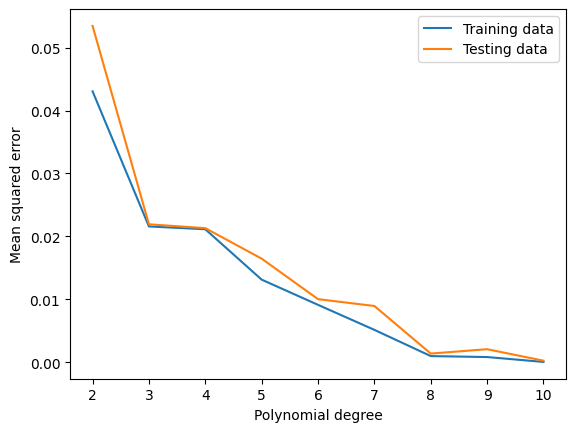

In [267]:
import matplotlib.pyplot as plt
from_degree = 2
to_degree = 10

degrees = list(range(from_degree, to_degree+1))
mse_train_values = np.zeros(to_degree-from_degree+1)
mse_test_values = np.zeros(to_degree-from_degree+1)
for degree in degrees:
    X = polynomial_features(x, degree)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    beta = OLS_parameters(X_train, y_train)

    prediction_train = X_train @ beta
    mse_train = mean_squared_error(y_train, prediction_train)

    prediction_test = X_test @ beta
    mse_test = mean_squared_error(y_test, prediction_test)

    mse_train_values[degree-from_degree] = mse_train
    mse_test_values[degree-from_degree] = mse_test

    # plt.title(f"Degree {degree} polynomial")
    # plt.scatter(x, y)
    # plt.plot(x, X @ beta, color="red")
    # plt.show()

plt.plot(degrees, mse_train_values, label="Training data")
plt.plot(degrees, mse_test_values, label="Testing data")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")
plt.legend()
plt.show()

**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

**Answer f)**\
The graph shows how both the MSE of the training data and test data decreases as the degree of polynomial we use to approximate the real function increases. We see that the test data MSE is approximately the same as training data, and both get very low as the polynomial degree increases. This tells us that the model works for both data it has seen before (training data) and new data (test data). 

The model has therefore good generalizability (at least for values in the same range as the train and test data (-3 to 3)), and performs well with very low MSE when the polynomial degree reaches 10.

---

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [302]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
X_sklearn = PolynomialFeatures(5).fit_transform(x.reshape(-1, 1))
X = polynomial_features(x, 5)

print(f"The largest difference between the two matrices is {abs(X-X_sklearn).max():.3}")

The largest difference between the two matrices is 5.68e-14


**Answer a)**\
The largest difference between the two matrices is an extremely small number. This is likely due to imprecision in floating point operations.

That means that the sklearn implementation creates the same feature matrix as my own `polynomial_features` function.

---

**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [315]:
from sklearn.linear_model import LinearRegression


theta = OLS_parameters(X, y)
theta_sklearn = LinearRegression(fit_intercept=False).fit(X, y).coef_
print(f"Own implementation: \t\t{theta}")
print(f"sklearn implementation: \t{theta_sklearn}")

Own implementation: 		[ 0.83946674  0.27464654 -0.02326439  0.05342623 -0.0034652  -0.0087781 ]
sklearn implementation: 	[ 0.83946674  0.27464654 -0.02326439  0.05342623 -0.0034652  -0.0087781 ]


**Answer b)**\
My function gives the exact same result as the sklearn implementation here.

---